# pandas 用户指南

## 10分钟了解pandas

### 创建对象

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



### 创建对象
通过传递值列表创建序列，并创建默认整数索引：

In [2]:
s = pd.Series([1,3,5,np.nan,6,8,10])
s

0     1.0
1     3.0
2     5.0
3     NaN
4     6.0
5     8.0
6    10.0
dtype: float64

通过传递带有日期时间索引和标记列的NumPy数组来创建数据帧：

<AxesSubplot:>

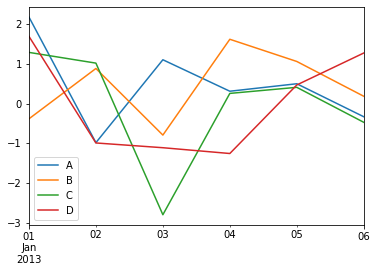

In [3]:
dates = pd.date_range('20130101',periods=6)
dates
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df
df.plot()

通过传递dict对象来创建一个数据帧，这些对象可以转换为类似于的系列。

In [4]:
df2 = pd.DataFrame(
    {
        'A':1.0,
        'B':pd.Timestamp("20130102"),
        'C':pd.Series(1,index=list(range(4)),dtype="float32"),
        'D':np.array([3]*4,dtype='int32'),
        "E":pd.Categorical(["test","train","test","train"]),
        "F":"foo"
    }
)
df2
#df2.dtypes

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.<Tab>

SyntaxError: invalid syntax (Temp/ipykernel_9264/1931971987.py, line 1)

### 查看数据
查看数据的开头和结尾几行、索引、行标题

In [5]:
df.head()

,A,B,C,D
2013-01-01,2.176314,-0.382406,1.287819,1.690855
2013-01-02,-0.981540,0.883018,1.017908,-0.989202
2013-01-03,1.102573,-0.791200,-2.792990,-1.108704
2013-01-04,0.311264,1.617584,0.256735,-1.254294
2013-01-05,0.499373,1.059543,0.409307,0.469002


In [6]:
df.tail(2)

,A,B,C,D
2013-01-05,0.499373,1.059543,0.409307,0.469002
2013-01-06,-0.329948,0.184958,-0.469824,1.271965


In [7]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy（）提供基础数据的numpy表示。请注意，当您的DataFrame具有具有不同数据类型的列时，这可能是一个昂贵的操作，这可以归结为一个根本性的差异,在pandas和NumPy之间：NumPy数组对整个数组有一个数据类型，而pandas数据帧有一个数据类型每列一个数据类型。当您调用DataFram.to_numpy（），pandas将找到可以保存所有数据的numpy数据类型数据帧中的数据类型。这可能最终成为一个对象，这需要将每个值强制转换为Python对象。对于df，所有浮点值的DataFrame，DataFrame.to_numpy（）速度快，不需要复制数据。

In [9]:
df.to_numpy()

array([[ 2.17631386, -0.38240633,  1.28781918,  1.69085511],
       [-0.98154021,  0.88301836,  1.01790776, -0.98920241],
       [ 1.10257317, -0.79119952, -2.79298968, -1.1087039 ],
       [ 0.31126407,  1.61758385,  0.25673452, -1.25429433],
       [ 0.49937343,  1.05954291,  0.40930725,  0.46900171],
       [-0.32994799,  0.18495836, -0.46982383,  1.27196485]])

对于df2DataFrame有多种数据类型，所以这种转换的代价是很高的。

·注意：DataFrame.to_numpy（）在输出中不包括索引或列标签。

In [10]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

dedcribe()显示数据的快速统计摘要：

In [11]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.463006,0.428583,-0.048507,0.013270
std,1.103114,0.919051,1.478883,1.302059
min,-0.981540,-0.791200,-2.792990,-1.254294
25%,-0.169645,-0.240565,-0.288184,-1.078829
50%,0.405319,0.533988,0.333021,-0.260100
75%,0.951773,1.015412,0.865758,1.071224
max,2.176314,1.617584,1.287819,1.690855


对矩阵进行转置

In [12]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,2.176314,-0.981540,1.102573,0.311264,0.499373,-0.329948
B,-0.382406,0.883018,-0.791200,1.617584,1.059543,0.184958
C,1.287819,1.017908,-2.792990,0.256735,0.409307,-0.469824
D,1.690855,-0.989202,-1.108704,-1.254294,0.469002,1.271965


分类与排序

In [13]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2013-01-01,1.690855,1.287819,-0.382406,2.176314
2013-01-02,-0.989202,1.017908,0.883018,-0.981540
2013-01-03,-1.108704,-2.792990,-0.791200,1.102573
2013-01-04,-1.254294,0.256735,1.617584,0.311264
2013-01-05,0.469002,0.409307,1.059543,0.499373
2013-01-06,1.271965,-0.469824,0.184958,-0.329948


In [14]:
df.sort_values(by="B",ascending=True)

,A,B,C,D
2013-01-03,1.102573,-0.791200,-2.792990,-1.108704
2013-01-01,2.176314,-0.382406,1.287819,1.690855
2013-01-06,-0.329948,0.184958,-0.469824,1.271965
2013-01-02,-0.981540,0.883018,1.017908,-0.989202
2013-01-05,0.499373,1.059543,0.409307,0.469002
2013-01-04,0.311264,1.617584,0.256735,-1.254294


### 选择
·注意：虽然用于选择和设置的标准Python/NumPy表达式直观，便于交互工作，但对于生产代码，我们建议使用优化的pandas数据访问方法，.at, .iat, .loc and .iloc.
#### Getting
选择单列，产生一个序列，相当于df.A:

In [15]:
df["A"]

2013-01-01    2.176314
2013-01-02   -0.981540
2013-01-03    1.102573
2013-01-04    0.311264
2013-01-05    0.499373
2013-01-06   -0.329948
Freq: D, Name: A, dtype: float64

用列表符[]，来选择会产生行的切片。

In [16]:
df[0:2]
df["20130101":"20130103"]

,A,B,C,D
2013-01-01,2.176314,-0.382406,1.287819,1.690855
2013-01-02,-0.981540,0.883018,1.017908,-0.989202
2013-01-03,1.102573,-0.791200,-2.792990,-1.108704


#### 通过标签来选择
要使用标签获取横截面，请执行以下操作：

In [17]:
df.loc[dates[0]]

A    2.176314
B   -0.382406
C    1.287819
D    1.690855
Name: 2013-01-01 00:00:00, dtype: float64

按标签在多轴上选择：

In [18]:
#df.loc[:,["A","B"]]
df.loc["20130102":"20130103",["A","B","C"]]

,A,B,C
2013-01-02,-0.981540,0.883018,1.017908
2013-01-03,1.102573,-0.791200,-2.792990


减少返回对象的维度

In [19]:
df.loc["20130102",["A","B"]]

A   -0.981540
B    0.883018
Name: 2013-01-02 00:00:00, dtype: float64

要获取标量值，请执行以下操作：
快速访问标量（相当于前面的方法）：

In [20]:
#df.loc[dates[0],"A"]
df.at[dates[1],"A"]

-0.9815402129675085

In [21]:
dates[:]

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df.A

2013-01-01    2.176314
2013-01-02   -0.981540
2013-01-03    1.102573
2013-01-04    0.311264
2013-01-05    0.499373
2013-01-06   -0.329948
Freq: D, Name: A, dtype: float64

### 通过位置来选择
通过传递的整数的位置选择：

In [23]:
df.iloc[3]

A    0.311264
B    1.617584
C    0.256735
D   -1.254294
Name: 2013-01-04 00:00:00, dtype: float64

通过整数列表来传递位置参数

In [24]:
df.iloc[[1,2,3],[0,2]]

,A,C
2013-01-02,-0.981540,1.017908
2013-01-03,1.102573,-2.792990
2013-01-04,0.311264,0.256735


In [25]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.981540,0.883018,1.017908,-0.989202
2013-01-03,1.102573,-0.791200,-2.792990,-1.108704


In [26]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.382406,1.287819
2013-01-02,0.883018,1.017908
2013-01-03,-0.791200,-2.792990
2013-01-04,1.617584,0.256735
2013-01-05,1.059543,0.409307
2013-01-06,0.184958,-0.469824


In [27]:
#df.iloc[1,1]
df.iat[1,1]

0.8830183562020788

### 布尔索引
使用单个列的值来选择数据。
从满足布尔条件的DataFrame中选择值。

In [28]:
df[df["A"]>0]

,A,B,C,D
2013-01-01,2.176314,-0.382406,1.287819,1.690855
2013-01-03,1.102573,-0.791200,-2.792990,-1.108704
2013-01-04,0.311264,1.617584,0.256735,-1.254294
2013-01-05,0.499373,1.059543,0.409307,0.469002


In [29]:
df[df>0]

,A,B,C,D
2013-01-01,2.176314,NaN,1.287819,1.690855
2013-01-02,NaN,0.883018,1.017908,NaN
2013-01-03,1.102573,NaN,NaN,NaN
2013-01-04,0.311264,1.617584,0.256735,NaN
2013-01-05,0.499373,1.059543,0.409307,0.469002
2013-01-06,NaN,0.184958,NaN,1.271965


使用isin（）方法进行筛选：

In [30]:
df2 = df.copy()
df2["E"] = ["one","one","two","three","four","three"]
df2

,A,B,C,D,E
2013-01-01,2.176314,-0.382406,1.287819,1.690855,one
2013-01-02,-0.981540,0.883018,1.017908,-0.989202,one
2013-01-03,1.102573,-0.791200,-2.792990,-1.108704,two
2013-01-04,0.311264,1.617584,0.256735,-1.254294,three
2013-01-05,0.499373,1.059543,0.409307,0.469002,four
2013-01-06,-0.329948,0.184958,-0.469824,1.271965,three


In [31]:
df2[df2["E"].isin(["two","four"])]

,A,B,C,D,E
2013-01-03,1.102573,-0.791200,-2.792990,-1.108704,two
2013-01-05,0.499373,1.059543,0.409307,0.469002,four


### 设置
设置新列会自动按索引对齐数据。

In [32]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range("20130102",periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [33]:
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,2.176314,-0.382406,1.287819,1.690855,NaN
2013-01-02,-0.981540,0.883018,1.017908,-0.989202,1.0
2013-01-03,1.102573,-0.791200,-2.792990,-1.108704,2.0
2013-01-04,0.311264,1.617584,0.256735,-1.254294,3.0
2013-01-05,0.499373,1.059543,0.409307,0.469002,4.0
2013-01-06,-0.329948,0.184958,-0.469824,1.271965,5.0


In [34]:
#通过标签来设置值
df.at[dates[0],"A"] = 0
#通过位置来设置值
df.iat[0,1] = 0
#通过使用NumPy数组指定来设置：
df.loc[:,"D"] = np.array([5]*len(df))

In [35]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.287819,5,NaN
2013-01-02,-0.981540,0.883018,1.017908,5,1.0
2013-01-03,1.102573,-0.791200,-2.792990,5,2.0
2013-01-04,0.311264,1.617584,0.256735,5,3.0
2013-01-05,0.499373,1.059543,0.409307,5,4.0
2013-01-06,-0.329948,0.184958,-0.469824,5,5.0


In [36]:
#具有设置的where操作。
df2 = df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.287819,-5,NaN
2013-01-02,-0.981540,-0.883018,-1.017908,-5,-1.0
2013-01-03,-1.102573,-0.791200,-2.792990,-5,-2.0
2013-01-04,-0.311264,-1.617584,-0.256735,-5,-3.0
2013-01-05,-0.499373,-1.059543,-0.409307,-5,-4.0
2013-01-06,-0.329948,-0.184958,-0.469824,-5,-5.0


## 缺失数据
pandas主要使用np.nan表示缺少的数据。默认情况下，它不包括在计算中。请参阅缺失数据部分。
重新索引允许您更改/添加/删除指定轴上的索引。这将返回数据的副本。

In [37]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns)+["E"])
df1.loc[dates[0]:dates[1],"E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.287819,5,NaN,1.0
2013-01-02,-0.981540,0.883018,1.017908,5,1.0,1.0
2013-01-03,1.102573,-0.791200,-2.792990,5,2.0,NaN
2013-01-04,0.311264,1.617584,0.256735,5,3.0,NaN


In [38]:
#删除丢失数据的任何行。
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.98154,0.883018,1.017908,5,1.0,1.0


In [39]:
#填充缺失数据
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.287819,5,5.0,1.0
2013-01-02,-0.981540,0.883018,1.017908,5,1.0,1.0
2013-01-03,1.102573,-0.791200,-2.792990,5,2.0,5.0
2013-01-04,0.311264,1.617584,0.256735,5,3.0,5.0


In [40]:
#获取值为nan的布尔掩码。
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### 操作
#### 统计数据
操作通常排除丢失的数据。
执行描述性统计：

In [41]:
df.mean()

A    0.100287
B    0.492317
C   -0.048507
D    5.000000
F    3.000000
dtype: float64

In [42]:
df.mean(1)

2013-01-01    1.571955
2013-01-02    1.383877
2013-01-03    0.903677
2013-01-04    2.037116
2013-01-05    2.193645
2013-01-06    1.877037
Freq: D, dtype: float64

操作具有不同维度且需要对齐的对象。此外，pandas还会沿指定的维度自动广播。

In [43]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
#DataFrame.shift(periods=1, freq=None, axis=0)
#period表示移动的幅度可以是正数也可以是负数
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [45]:
df.sub(s,axis=0)
#用法：DataFrame.sub(other, axis=’columns’, level=None, fill_value=None)
#Pandas dataframe.sub()函数用于查找数据帧和其他逐元素的减法。此功能与执行 dataframe - other 但支持替换其中一个输入中的丢失数据。
#other:系列，DataFrame或常量
#axis:对于系列输入，轴与系列索引匹配
#level:在一个级别上广播，在传递的MultiIndex级别上匹配Index值
#fill_value:在计算之前，请使用此值填充现有的缺失(NaN)值以及成功完成DataFrame对齐所需的任何新元素。如果两个对应的DataFrame位置中的数据均丢失，则结果将丢失。

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.102573,-1.791200,-3.792990,4.0,1.0
2013-01-04,-2.688736,-1.382416,-2.743265,2.0,0.0
2013-01-05,-4.500627,-3.940457,-4.590693,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN
